In [429]:
import pandas as pd

data = pd.read_csv('heart.csv')

data.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [430]:
data.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [431]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


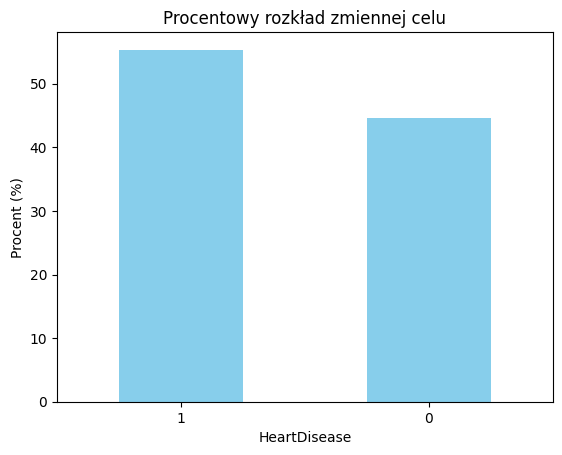

In [432]:
import matplotlib.pyplot as plt

(data['HeartDisease'].value_counts(normalize=True) * 100).plot(kind='bar', color='skyblue')

plt.title('Procentowy rozkład zmiennej celu')
plt.xlabel('HeartDisease')
plt.ylabel('Procent (%)')
plt.xticks(rotation=0) 
plt.show()

In [433]:
import numpy as np

numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# wartości odstające przed usunięciem
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Kolumna {col}:")
    print(f"  Odstające wartości: {len(outliers)}")
    print(f"  Dolna granica: {lower_bound}, Górna granica: {upper_bound}")

Kolumna Age:
  Odstające wartości: 0
  Dolna granica: 27.5, Górna granica: 79.5
Kolumna RestingBP:
  Odstające wartości: 28
  Dolna granica: 90.0, Górna granica: 170.0
Kolumna Cholesterol:
  Odstające wartości: 183
  Dolna granica: 32.625, Górna granica: 407.625
Kolumna MaxHR:
  Odstające wartości: 2
  Dolna granica: 66.0, Górna granica: 210.0
Kolumna Oldpeak:
  Odstające wartości: 16
  Dolna granica: -2.25, Górna granica: 3.75


In [434]:
# określenie wartości odstających i zastąpienie medianą
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = data[col].median()
    data[col] = np.where(data[col] < lower_bound, median, data[col])
    data[col] = np.where(data[col] > upper_bound, median, data[col])



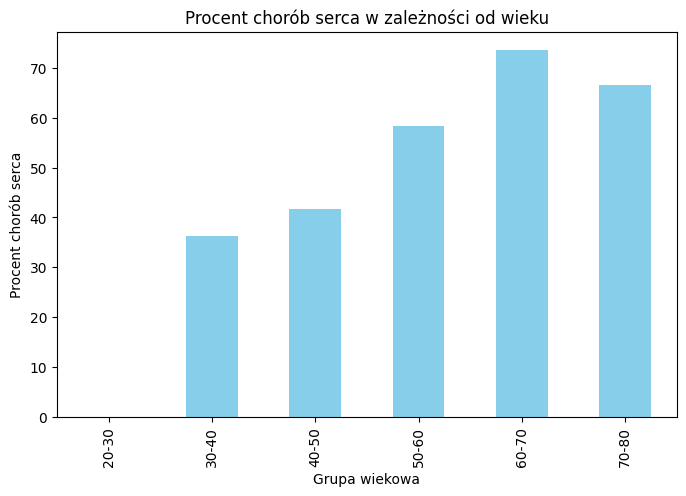

In [435]:
# Zależność wieku od chorób serca
age_groups = pd.cut(data['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
age_heart_disease = data.groupby(age_groups, observed=False)['HeartDisease'].mean() * 100
age_heart_disease.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Procent chorób serca w zależności od wieku')
plt.xlabel('Grupa wiekowa')
plt.ylabel('Procent chorób serca')
plt.show()

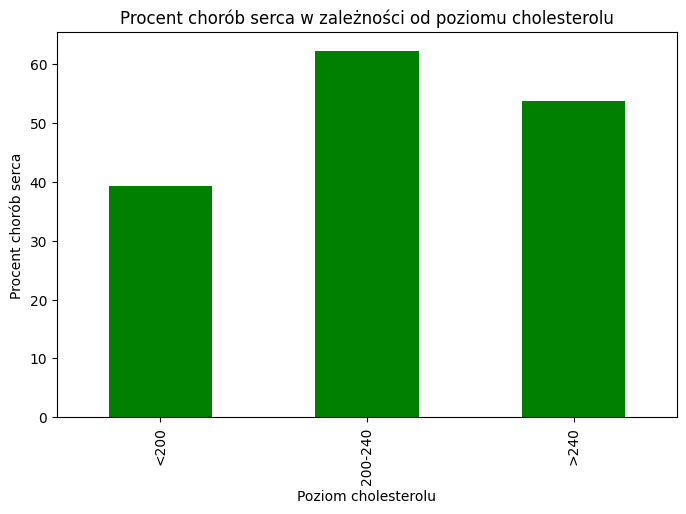

In [436]:
# Zależność Cholesterol od HeartDisease
cholesterol_groups = pd.cut(data['Cholesterol'], bins=[0, 200, 240, 600], labels=['<200', '200-240', '>240'])
cholesterol_heart_disease = data.groupby(cholesterol_groups, observed=False)['HeartDisease'].mean() * 100
cholesterol_heart_disease.plot(kind='bar', color='green', figsize=(8, 5))
plt.title('Procent chorób serca w zależności od poziomu cholesterolu')
plt.xlabel('Poziom cholesterolu')
plt.ylabel('Procent chorób serca')
plt.show()

In [437]:
from sklearn.model_selection import train_test_split

X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']
X = pd.get_dummies(X, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [438]:
from sklearn.preprocessing import StandardScaler

# standaryzacja
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Rozmiar X_train:", X_train.shape)
print("Rozmiar X_test:", X_test.shape)
print("Rozmiar y_train:", y_train.shape)
print("Rozmiar y_test:", y_test.shape)



Rozmiar X_train: (734, 15)
Rozmiar X_test: (184, 15)
Rozmiar y_train: (734,)
Rozmiar y_test: (184,)


In [439]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  
    metrics=['accuracy']
)


In [440]:
history = model.fit(
    X_train, y_train, 
    epochs=6,         
    batch_size=16,     
    validation_split=0.2  
)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/6
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6901 - loss: 0.6017 - val_accuracy: 0.8231 - val_loss: 0.3869
Epoch 2/6
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8628 - loss: 0.3409 - val_accuracy: 0.8163 - val_loss: 0.3867
Epoch 3/6
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8532 - loss: 0.3255 - val_accuracy: 0.8163 - val_loss: 0.3920
Epoch 4/6
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8512 - loss: 0.3338 - val_accuracy: 0.8367 - val_loss: 0.4038
Epoch 5/6
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9024 - loss: 0.2467 - val_accuracy: 0.8367 - val_loss: 0.3796
Epoch 6/6
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8904 - loss: 0.2710 - val_accuracy: 0.8367 - val_loss: 0.4231
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8635 - loss: 0.3294 
Test Loss: 0.3140
Test Accuracy: 0.8750


In [441]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [442]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



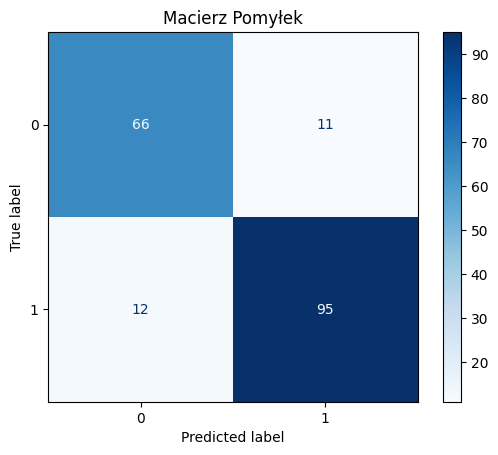

In [443]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')  
plt.title("Macierz Pomyłek")
plt.show()


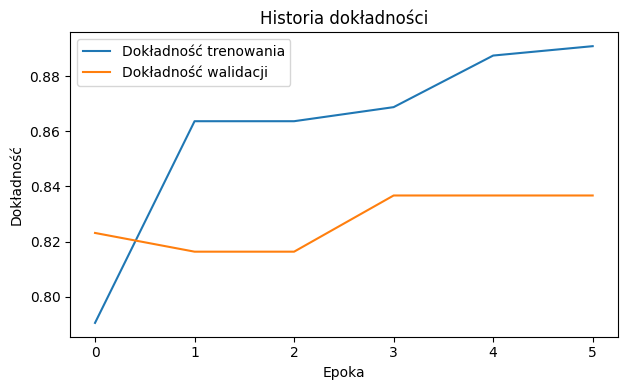

In [444]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Dokładność trenowania')
plt.plot(history.history['val_accuracy'], label='Dokładność walidacji')
plt.title('Historia dokładności')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()

plt.tight_layout()
plt.show()
